In [1]:
import pandas as pd

df = pd.read_csv("data/processed/feature_engineered.csv", parse_dates=["date"])
df["date"].dt.month.value_counts().sort_index()


date
1    372
2    336
3    372
Name: count, dtype: int64

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

print(tf.__version__)
model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
model.add(Dense(1))
print(model.summary())

2.20.0


c:\Users\Sakshi Singhania\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [3]:
import pandas as pd
df = pd.read_csv("data/processed/feature_engineered.csv")
print(df.columns.tolist())  # Confirm column names
print(df[(df["region"] == "East US") & (df["resource_type"] == "Compute")].shape)
df = pd.read_csv("data/processed/feature_engineered.csv")
print(df[["region", "resource_type"]].drop_duplicates())

['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage', 'users_active', 'day_of_week', 'month', 'quarter', 'is_weekend', 'utilization_ratio', 'storage_efficiency', 'cpu_lag_1', 'cpu_lag_3', 'cpu_lag_7', 'cpu_roll_mean_7', 'cpu_roll_mean_30', 'cpu_roll_max_7', 'cpu_roll_min_7']
(0, 19)
             region resource_type
0           East US            VM
1           East US       Storage
2           East US     Container
270    North Europe            VM
271    North Europe       Storage
272    North Europe     Container
540  Southeast Asia            VM
541  Southeast Asia       Storage
542  Southeast Asia     Container
810         West US            VM
811         West US       Storage
812         West US     Container


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


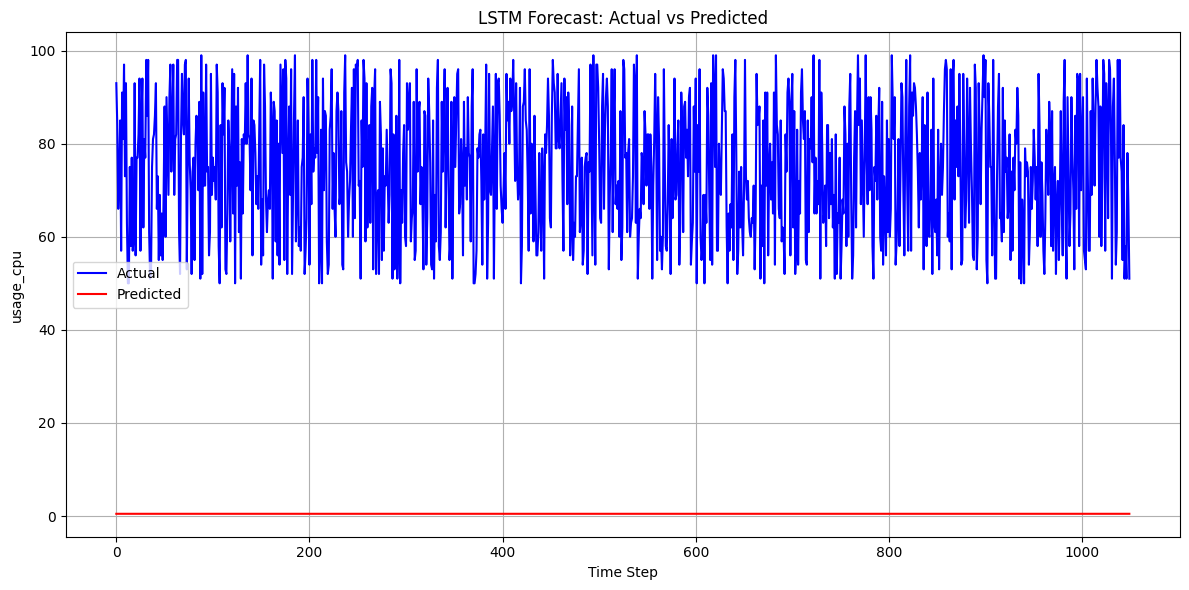

In [7]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# 📁 Paths
DATA_PATH = "data/processed/feature_engineered.csv"
MODEL_PATH = "models/lstm_model.h5"
TARGET = "usage_cpu"
WINDOW = 30

# 📥 Load and preprocess data
df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df = df.sort_values("date").reset_index(drop=True)

# Drop non-numeric and target
X = df.drop(columns=["date", TARGET]).select_dtypes(include=["float64", "int64"])
y = df[TARGET].astype(np.float32)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 Build sequences
X_seq, y_seq = [], []
for i in range(WINDOW, len(X_scaled)):
    X_seq.append(X_scaled[i-WINDOW:i])
    y_seq.append(y[i])  # Predict next timestep

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🧠 Load model
model = load_model(MODEL_PATH, compile=False)

# 🔮 Predict
y_pred = model.predict(X_seq).flatten()

# 📊 Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_seq, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red")
plt.title("LSTM Forecast: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel(TARGET)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Plot training loss (optional)
# If you saved history.history, you can plot it here
# Example:
# import json
# with open("data/outputs/history.json") as f:
#     history = json.load(f)
# plt.plot(history["loss"], label="Train Loss")
# plt.plot(history["val_loss"], label="Val Loss")

In [8]:
import pandas as pd

# Load the CSV
df = pd.read_csv("data/processed/feature_engineered.csv")

# Display column names
print("📊 Columns in feature_engineered.csv:")
print(df.columns.tolist())

📊 Columns in feature_engineered.csv:
['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage', 'users_active', 'day_of_week', 'month', 'quarter', 'is_weekend', 'utilization_ratio', 'storage_efficiency', 'cpu_lag_1', 'cpu_lag_3', 'cpu_lag_7', 'cpu_roll_mean_7', 'cpu_roll_mean_30', 'cpu_roll_max_7', 'cpu_roll_min_7']


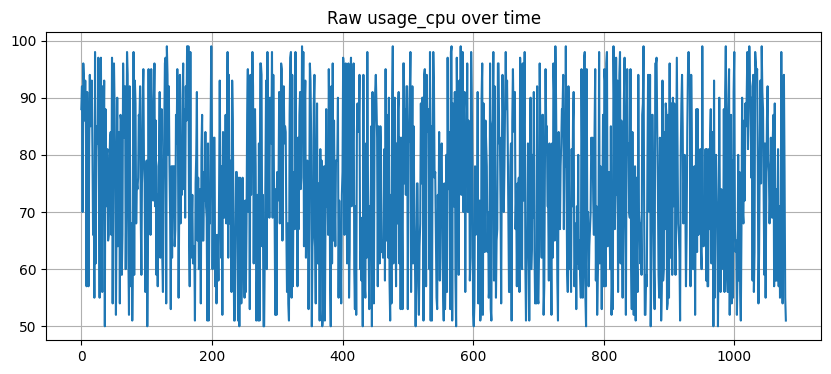

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(df["usage_cpu"])
plt.title("Raw usage_cpu over time")
plt.grid(True)
plt.show()

Columns: ['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage', 'users_active', 'day_of_week', 'month', 'quarter', 'is_weekend', 'utilization_ratio', 'storage_efficiency', 'cpu_lag_1', 'cpu_lag_3', 'cpu_lag_7', 'cpu_roll_mean_7', 'cpu_roll_mean_30', 'cpu_roll_max_7', 'cpu_roll_min_7']
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


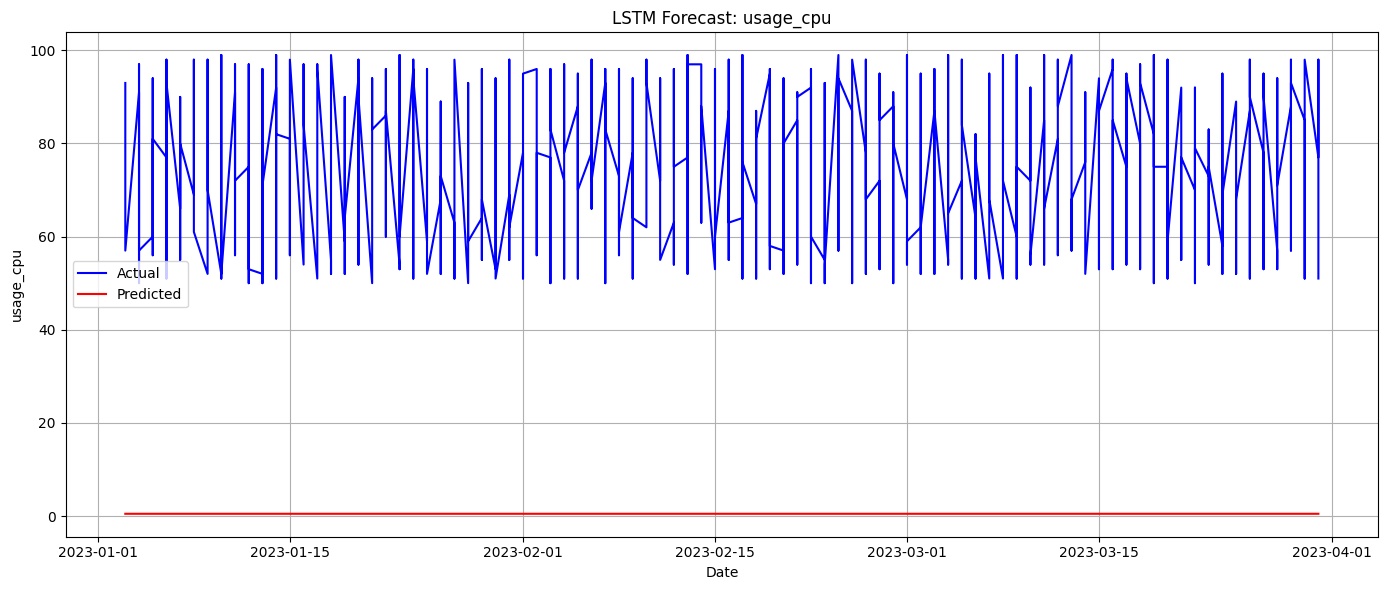

In [10]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# 📁 Paths
DATA_PATH = "data/processed/feature_engineered.csv"
MODEL_PATH = "models/lstm_model.h5"
TARGET = "usage_cpu"
WINDOW = 30

# 📥 Load and inspect data
df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df = df.sort_values("date").reset_index(drop=True)

# 📊 Show columns
print("Columns:", df.columns.tolist())

# 🧼 Drop non-numeric and target column
feature_cols = df.drop(columns=["date", "region", "resource_type", TARGET]).select_dtypes(include=["float64", "int64"]).columns.tolist()
X = df[feature_cols]
y = df[TARGET].astype(np.float32)

# 🧪 Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 Build sequences
X_seq, y_seq = [], []
for i in range(WINDOW, len(X_scaled)):
    X_seq.append(X_scaled[i-WINDOW:i])
    y_seq.append(y[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 🔮 Load model and predict
model = load_model(MODEL_PATH, compile=False)
y_pred = model.predict(X_seq).flatten()

# 📈 Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(df["date"].values[WINDOW:], y_seq, label="Actual", color="blue")
plt.plot(df["date"].values[WINDOW:], y_pred, label="Predicted", color="red")
plt.title("LSTM Forecast: usage_cpu")
plt.xlabel("Date")
plt.ylabel("usage_cpu")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage', 'users_active', 'day_of_week', 'month', 'quarter', 'is_weekend', 'utilization_ratio', 'storage_efficiency', 'cpu_lag_1', 'cpu_lag_3', 'cpu_lag_7', 'cpu_roll_mean_7', 'cpu_roll_mean_30', 'cpu_roll_max_7', 'cpu_roll_min_7']


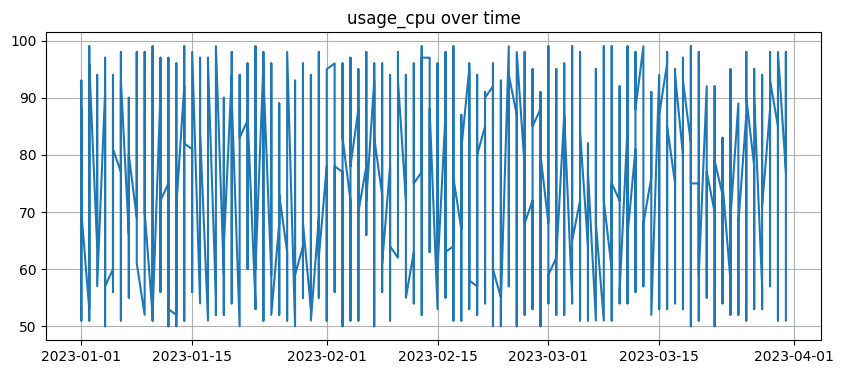

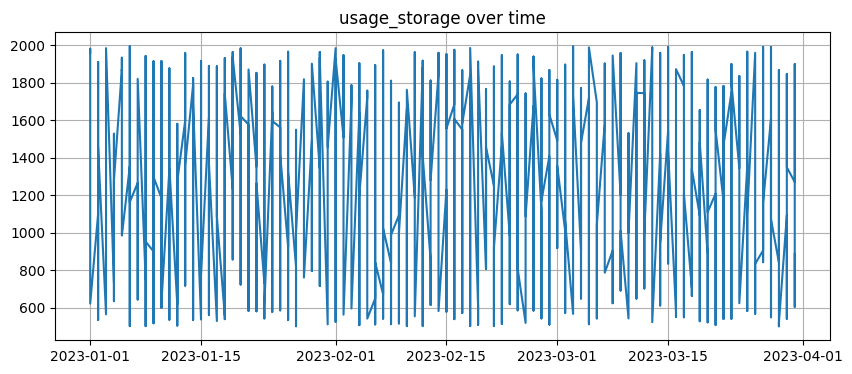

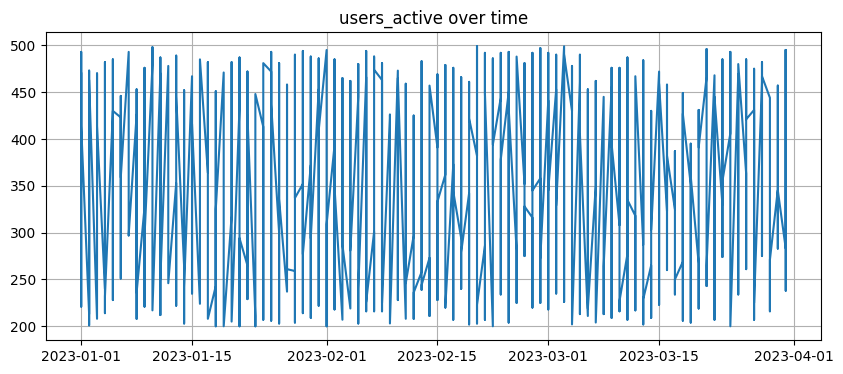

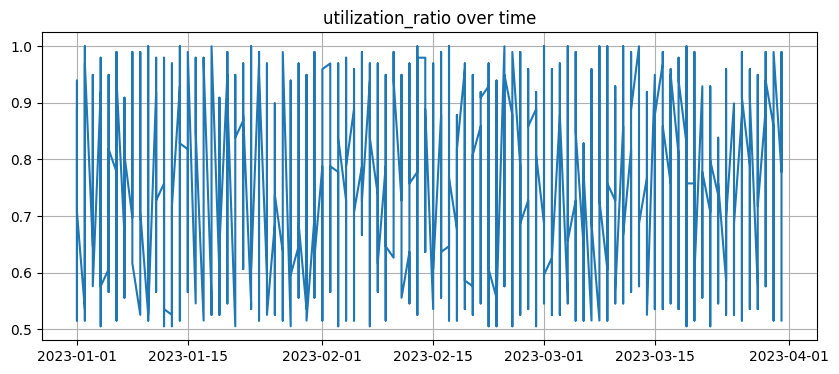

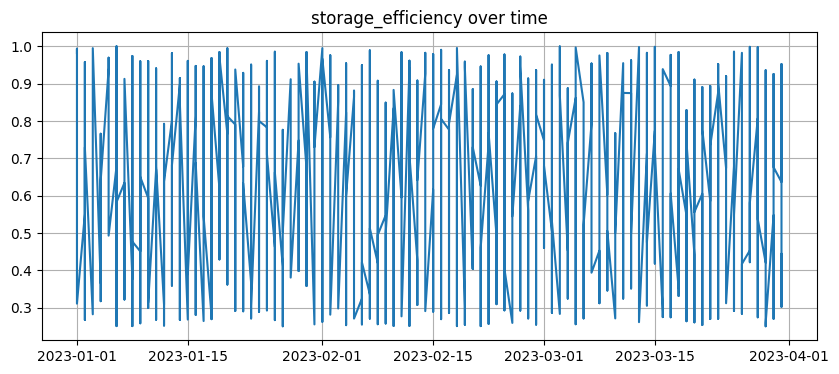

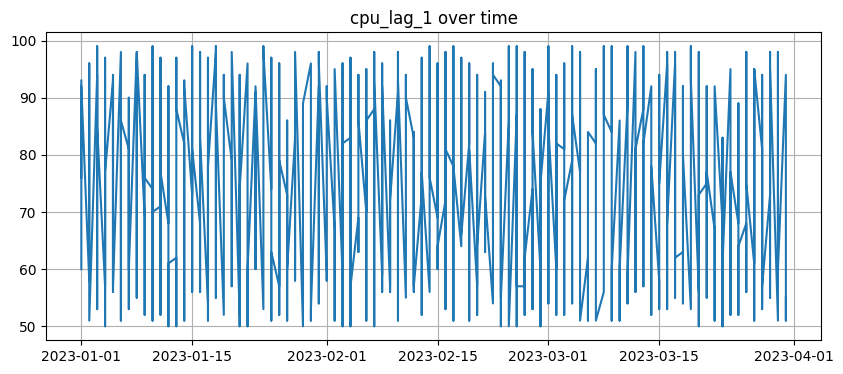

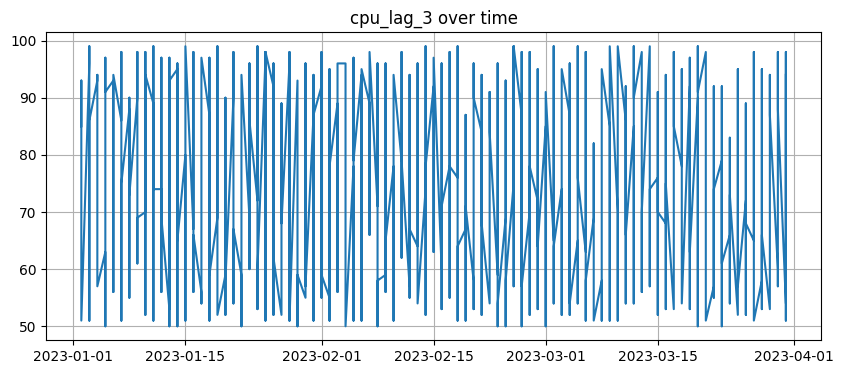

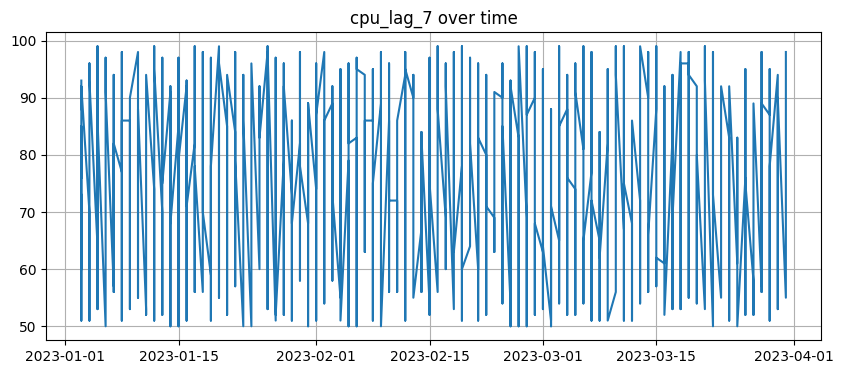

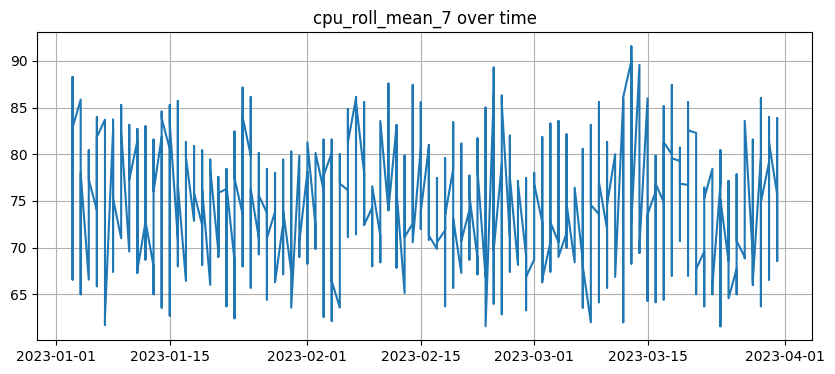

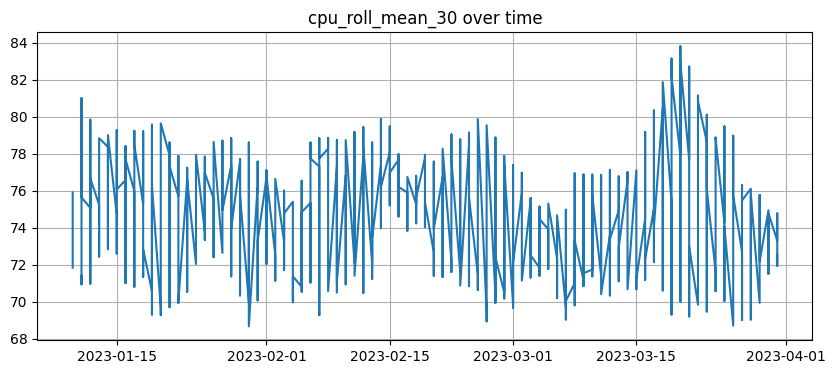

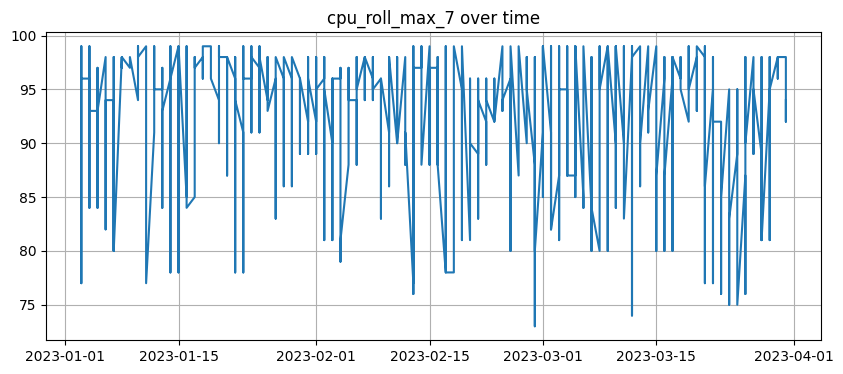

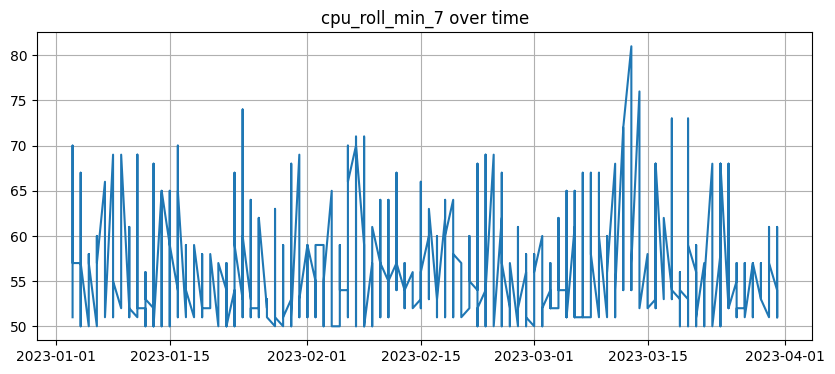

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/processed/feature_engineered.csv", parse_dates=["date"])
df = df.sort_values("date")
print(df.columns.tolist())

features = ['usage_cpu', 'usage_storage', 'users_active', 'utilization_ratio',
            'storage_efficiency', 'cpu_lag_1', 'cpu_lag_3', 'cpu_lag_7',
            'cpu_roll_mean_7', 'cpu_roll_mean_30', 'cpu_roll_max_7', 'cpu_roll_min_7']

for col in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df["date"], df[col])
    plt.title(f"{col} over time")
    plt.grid(True)
    plt.show()

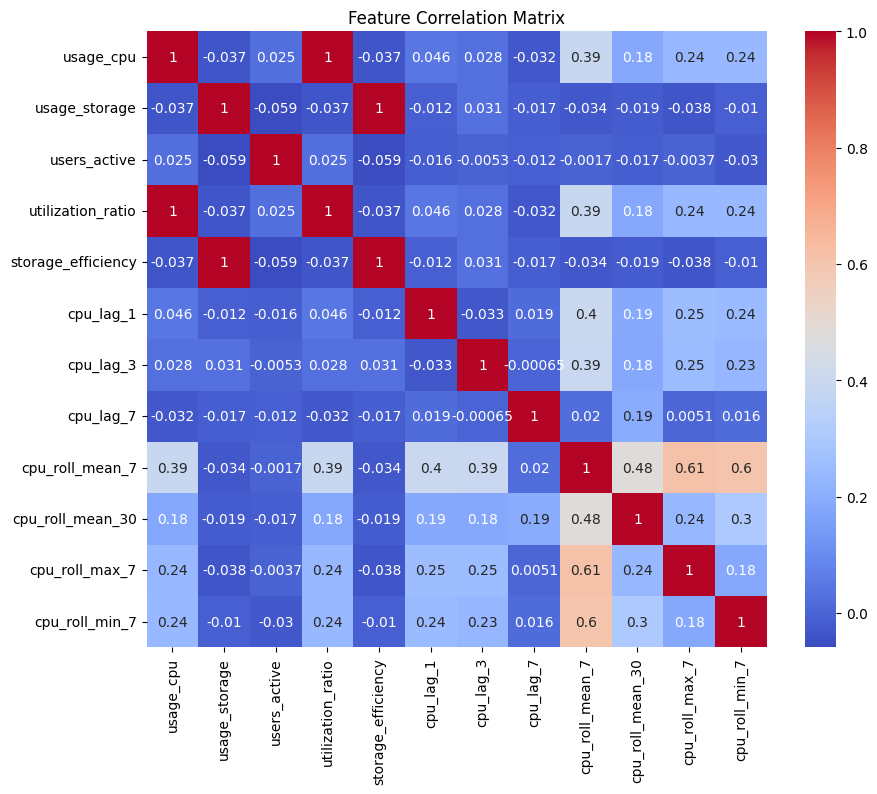

In [12]:
corr = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

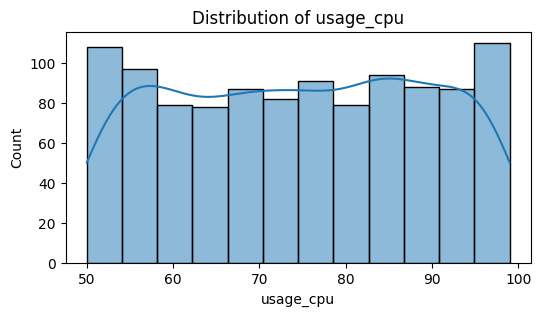

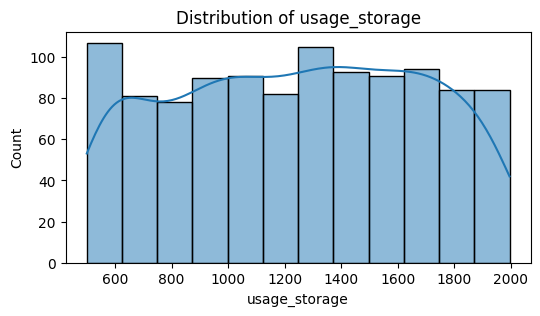

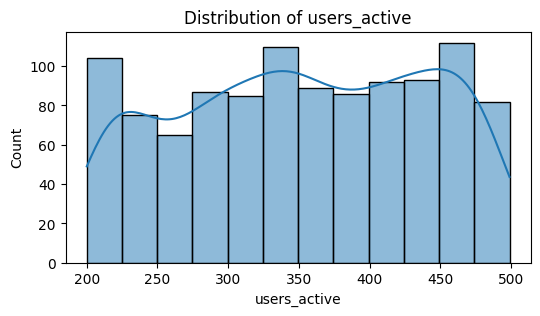

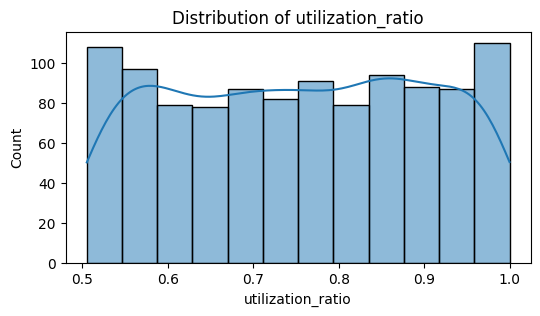

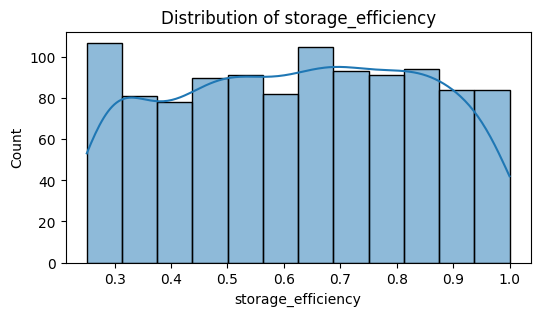

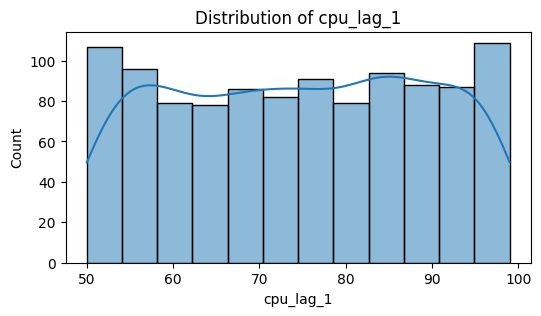

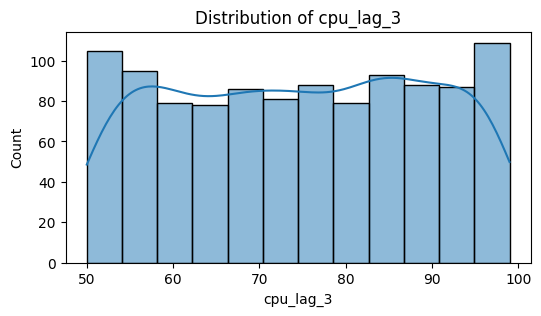

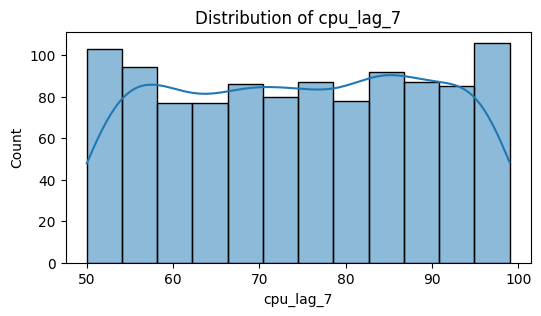

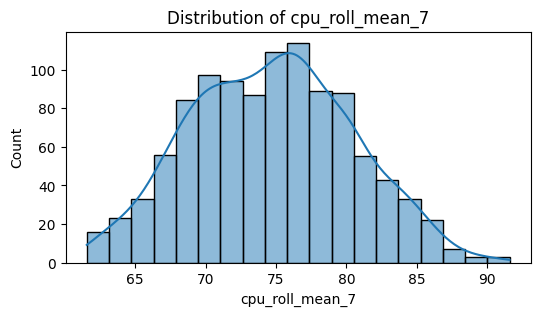

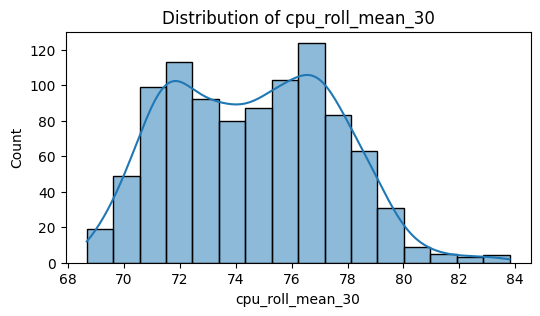

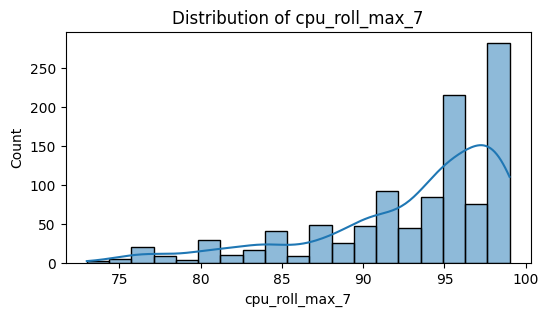

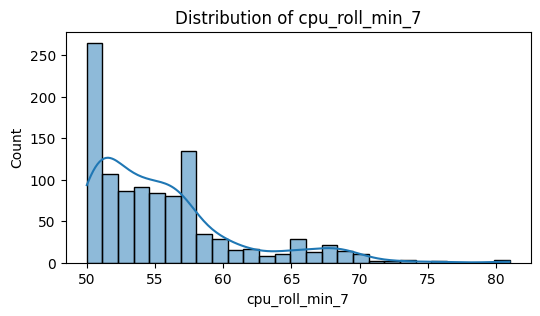

In [13]:
for col in features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [14]:
import matplotlib.pyplot as plt
plt.plot(X_input[0])
plt.title("Last input sequence")
plt.show()

NameError: name 'X_input' is not defined